# 🧠 Neuromorphic Network Controller
Simulating Spiking Neural Networks for Adaptive Traffic Routing

### 📚 Description
This notebook simulates a computer network where each node runs a Spiking Neural Network (SNN) to make adaptive routing decisions based on incoming traffic. The neurons fire based on traffic spikes and use a plasticity rule to adapt over time, mimicking a biological brain's learning process.

In [9]:
# Install required libraries
pip install brian2 networkx matplotlib

SyntaxError: invalid syntax (3203627918.py, line 2)

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from brian2 import *

### 🕸️ Create Network Topology

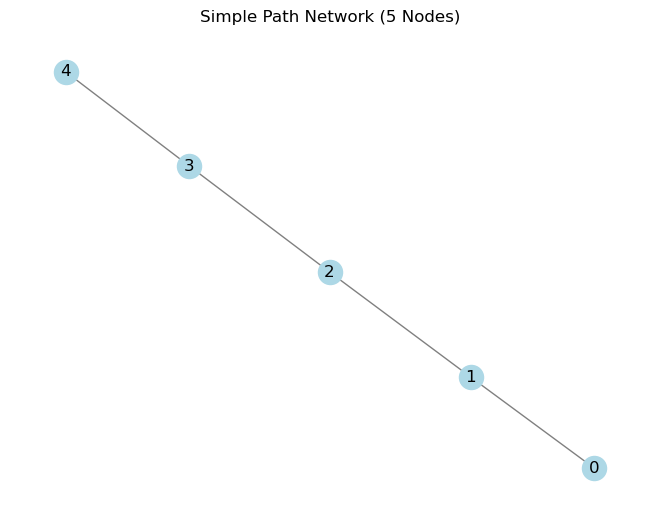

In [3]:
# Create a simple network topology
G = nx.generators.classic.path_graph(5)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Simple Path Network (5 Nodes)")
plt.show()

### 📊 Generate Synthetic Traffic as Spikes

In [4]:
# Generate synthetic traffic (packet arrivals) as Poisson spike trains
n_nodes = len(G.nodes)
duration = 100*ms

traffic_input = PoissonGroup(n_nodes, rates='50*Hz')  # simulate moderate traffic
mon_input = SpikeMonitor(traffic_input)

### 🧬 Define Spiking Neural Network (SNN)

In [5]:
# Create SNN neurons for routing decisions
eqs = '''
dv/dt = (1.0 - v)/tau : 1
tau : second
'''

neurons = NeuronGroup(n_nodes, eqs, threshold='v>1', reset='v = 0', method='exact')
neurons.tau = '10*ms'
syn = Synapses(traffic_input, neurons, on_pre='v += 0.2')
syn.connect(j='i')

mon_neurons = SpikeMonitor(neurons)

### 🚦 Run SNN Simulation

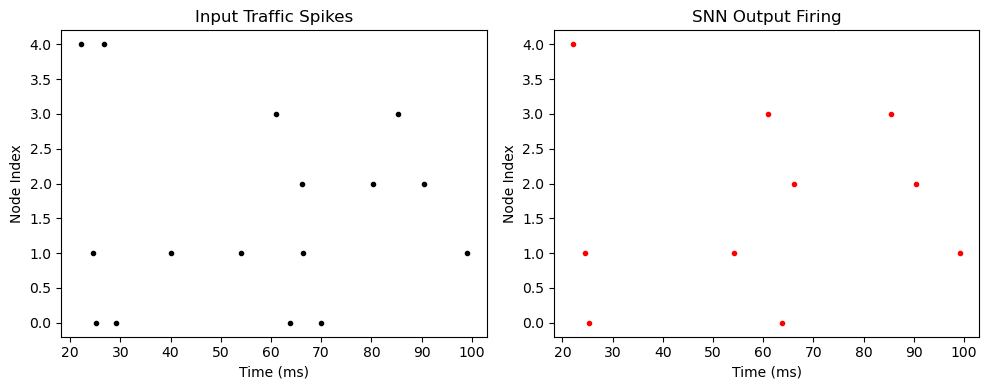

In [6]:
run(duration)

# Plot input and output spikes
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(mon_input.t/ms, mon_input.i, '.k')
plt.title("Input Traffic Spikes")
plt.xlabel("Time (ms)")
plt.ylabel("Node Index")

plt.subplot(122)
plt.plot(mon_neurons.t/ms, mon_neurons.i, '.r')
plt.title("SNN Output Firing")
plt.xlabel("Time (ms)")
plt.ylabel("Node Index")

plt.tight_layout()
plt.show()

### 🧠 Adaptive Routing Logic (Conceptual)
You can map the neuron that fires most strongly to the preferred next-hop route. Over time, with STDP-like plasticity, the network could learn which paths are best under different traffic conditions.